# Customers clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import matplotlib as mlp

%matplotlib inline

In [2]:
# Load the data

df = pd.read_csv('sales_rfm.csv', index_col='Customer ID')
segment = df['Segment']
df.drop(['Segment'], axis=1, inplace=True)
df.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,24,8,5633.32,5,4,5,545
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212


In [3]:
# Scale the data

scaler = StandardScaler()
arr = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

In [4]:
# Create a new dataframe with the scaled data

df_scaled = pd.DataFrame(data = arr,
                        index = df.index,
                        columns = ['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled'])
df_scaled.head()

,RecencyScaled,FrequencyScaled,MonetaryScaled
Customer ID,,,
12346,0.591999,0.443501,5.059391
12347,-0.949974,0.134057,0.177579
12348,-0.601479,-0.098027,-0.067718
12349,-0.873592,-0.175388,0.095814
12350,0.520390,-0.407471,-0.182088


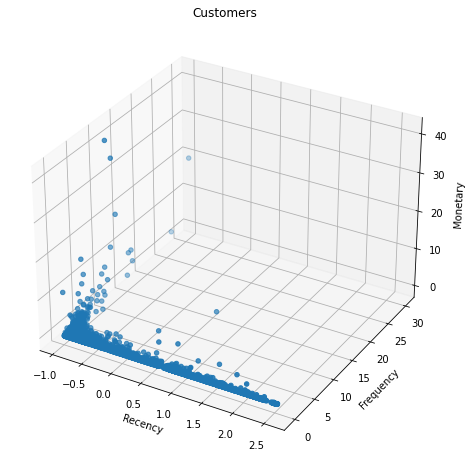

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_scaled['RecencyScaled'], df_scaled['FrequencyScaled'], df_scaled['MonetaryScaled'])
ax.set_title('Customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()


In [6]:
# Use a kmeans model to predict the customers label

model = KMeans(n_clusters=10)
model.fit(df_scaled)
pred = model.predict(df_scaled)

In [7]:
df_scaled['Label'] = pred
df_scaled.head()

,RecencyScaled,FrequencyScaled,MonetaryScaled,Label
Customer ID,,,,
12346,0.591999,0.443501,5.059391,3
12347,-0.949974,0.134057,0.177579,6
12348,-0.601479,-0.098027,-0.067718,6
12349,-0.873592,-0.175388,0.095814,6
12350,0.520390,-0.407471,-0.182088,0


In [8]:
cluster_centers = model.cluster_centers_
cluster_centers = pd.DataFrame(data = cluster_centers,
                              columns = ['Recency Val', 'Frequency Val', 'Monetary Val'])
cluster_centers

,Recency Val,Frequency Val,Monetary Val
0,0.068807,-0.235903,-0.133115
1,-0.660357,16.276728,4.868377
2,1.010388,-0.294729,-0.149117
3,-0.811697,1.205038,0.484585
4,-0.957135,10.693839,38.396781
5,-0.915602,5.982552,11.820940
6,-0.759887,-0.092272,-0.079751
7,-0.954748,30.304864,19.884478
8,-0.871116,4.237057,2.300755
9,2.009544,-0.366365,-0.162909


<Figure size 432x288 with 0 Axes>

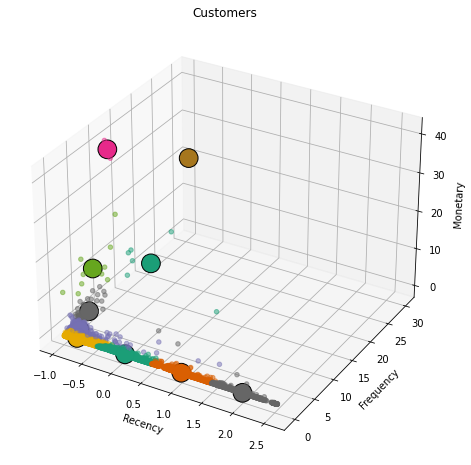

In [9]:
# Visualise the customers and the clusters centers

plt.clf()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')

cmap = mlp.cm.get_cmap('Dark2')

ax.scatter(df_scaled['RecencyScaled'], df_scaled['FrequencyScaled'], df_scaled['MonetaryScaled'], c=df_scaled['Label'], cmap=cmap, alpha=0.5)
ax.scatter(cluster_centers['Recency Val'], cluster_centers['Frequency Val'], cluster_centers['Monetary Val'], c=cluster_centers.index, cmap=cmap, alpha=1, s=350, edgecolors='black')
ax.set_title('Customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()


In [10]:
# Use kmeans with different numbers of clusters

l = []
for i in range(1, 16):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 25)
    model.fit(df_scaled)
    l.append(model.inertia_)

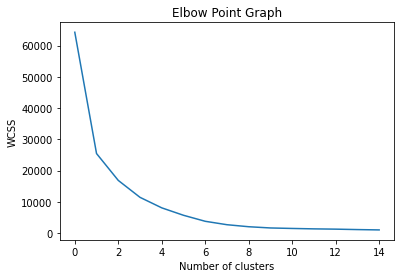

In [11]:
# Use the elbow method to find the best number of clusters for kmeans 

l = np.array(l)

plt.clf()

sns.lineplot(x=range(len(l)), y=l)
plt.title('Elbow Point Graph')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

In [12]:
model = KMeans(n_clusters = 5, init='k-means++', random_state=25)
model.fit(df_scaled)
pred = model.predict(df_scaled)

In [13]:
df_f = pd.read_csv('sales_rfm.csv', index_col='Customer ID')
df_f['Label'] = pred
df_f.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Label
Customer ID,,,,,,,,,
12346,347,12,77556.46,2,5,5,255,Can't lose,1
12347,24,8,5633.32,5,4,5,545,Champions,0
12348,97,5,2019.40,3,4,4,344,Loyal Customers,0
12349,40,4,4428.69,5,3,5,535,Potential Loyalists,0
12350,332,1,334.40,2,1,2,212,Hibernating,4


In [14]:
df_comp = df_f.groupby(['Label'])['Segment'].value_counts()
df_comp

Label  Segment            
0      Loyal Customers        850
       Potential Loyalists    714
       Champions              542
       About to Sleep         252
       Need attention         163
       Promising              110
       New Customers           57
       Can't lose               1
1      Hibernating            679
       At risk                395
       Champions              293
       Loyal Customers        185
       Can't lose              37
       Need attention           1
2      Hibernating            544
       At risk                 90
       Can't lose               4
3      Champions               15
       Can't lose               1
       Loyal Customers          1
4      Hibernating            300
       At risk                265
       About to Sleep         135
       Loyal Customers        112
       Need attention         106
       Can't lose              29
Name: Segment, dtype: int64

In [15]:
model = KMeans(n_clusters = 10, init='k-means++', random_state=25)
model.fit(df_scaled)
pred = model.predict(df_scaled)

In [16]:
df_f['Label'] = pred
df_comp = df_f.groupby(['Label'])['Segment'].value_counts()
df_comp

Label  Segment            
0      Loyal Customers        844
       Potential Loyalists    713
       Champions              495
       About to Sleep         252
       Need attention         163
       Promising              110
       New Customers           57
1      Hibernating            300
       At risk                265
       About to Sleep         135
       Loyal Customers        112
       Need attention         106
       Can't lose              29
2      Hibernating            544
       At risk                 90
       Can't lose               3
3      Hibernating            679
       At risk                394
       Can't lose              29
4      Champions                5
       Can't lose               1
5      Champions              293
       Loyal Customers        185
       Can't lose               8
       At risk                  1
       Need attention           1
6      Champions                2
7      Champions                1
8      Champions     